In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
import seaborn as sns

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Specify the file path of your CSV dataset

# Load the CSV file into a pandas DataFrame
df  = pd.read_csv("als_data2.csv")

# Display the first few rows of the DataFrame
df.head()

,Age Group,Gender,Civil Status,Religion,IP,Mother Tongue,PWD,FathersWork,MothersWork,NumberOfParentsWorking,LastGradeAttended,NeedToWork,AttendedALSBefore,CompletedALS,Dist_CLC_Home_Km,TravelTime_mins,ModeOfTranspo,NoOfHoursAvailable,Completers
0,3,MALE,SINGLE,ROMAN CATHOLIC,CEBUANO,CEBUANO,NO,NONE,SELF-EMPLOYED,1,8,YES,YES,YES,0.43,10,WALKING,4.0,YES
1,2,MALE,SINGLE,ROMAN CATHOLIC,CEBUANO,CEBUANO,NO,LABORER,SELF-EMPLOYED,1,6,YES,NO,NO,0.18,10,WALKING,4.0,YES
2,2,MALE,SINGLE,ROMAN CATHOLIC,CEBUANO,CEBUANO,NO,FARMER,SELF-EMPLOYED,1,8,YES,NO,NO,0.45,10,WALKING,4.0,YES
3,2,MALE,SINGLE,ROMAN CATHOLIC,CEBUANO,CEBUANO,NO,MINIMUM WAGE EARNER,SELF-EMPLOYED,1,10,NO,NO,NO,0.43,10,WALKING,4.0,YES
4,3,FEMALE,MARRIED,ROMAN CATHOLIC,CEBUANO,CEBUANO,NO,LABORER,SELF-EMPLOYED,1,9,NO,NO,NO,0.43,10,WALKING,4.0,YES


In [62]:

#Label Encoding using LabelEncoder for Categorical Data to Numerical Data

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'gender' column
df['Gender'] = lab.fit_transform(df['Gender'])

#perform label encoding on 'Civil Status' column
df['Civil Status'] = lab.fit_transform(df['Civil Status'])

#perform label encoding on 'Religion' column
df['Religion'] = lab.fit_transform(df['Religion'])

#perform label encoding on 'IP' column
df['IP'] = lab.fit_transform(df['IP'])

#perform label encoding on 'Mother Tongue' column
df['Mother Tongue'] = lab.fit_transform(df['Mother Tongue'])

#perform label encoding on 'Mother Tongue' column
df['PWD'] = lab.fit_transform(df['PWD'])

#perform label encoding on 'FathersWork' column
df['FathersWork'] = lab.fit_transform(df['FathersWork'])

#perform label encoding on 'MothersWork' column
df['MothersWork'] = lab.fit_transform(df['MothersWork'])

#perform label encoding on 'NeedToWork' column
df['NeedToWork'] = lab.fit_transform(df['NeedToWork'])

#perform label encoding on 'AttendedALSBefore' column
df['AttendedALSBefore'] = lab.fit_transform(df['AttendedALSBefore'])

#perform label encoding on 'CompletedALSBefore' column
df['CompletedALS'] = lab.fit_transform(df['CompletedALS'])

#perform label encoding on 'ModeOfTranspo' column
df['ModeOfTranspo'] = lab.fit_transform(df['ModeOfTranspo'])

#perform label encoding on 'Passer' column
df['Completers'] = lab.fit_transform(df['Completers'])
#data conversion
#categorical to numerical
# Female-0 Male - 1
# Civil Status : Single-4 Married-2 
# Catholic -1 Non-Catholic-0

df[:10]

,Age Group,Gender,Civil Status,Religion,IP,Mother Tongue,PWD,FathersWork,MothersWork,NumberOfParentsWorking,LastGradeAttended,NeedToWork,AttendedALSBefore,CompletedALS,Dist_CLC_Home_Km,TravelTime_mins,ModeOfTranspo,NoOfHoursAvailable,Completers
0,3,1,3,1,2,1,0,10,12,1,8,1,1,1,0.43,10,4,4.0,1
1,2,1,3,1,2,1,0,8,12,1,6,1,0,0,0.18,10,4,4.0,1
2,2,1,3,1,2,1,0,4,12,1,8,1,0,0,0.45,10,4,4.0,1
3,2,1,3,1,2,1,0,9,12,1,10,0,0,0,0.43,10,4,4.0,1
4,3,0,1,1,2,1,0,8,12,1,9,0,0,0,0.43,10,4,4.0,1
5,2,0,3,1,2,1,0,10,5,1,8,1,1,1,0.44,10,4,4.0,1
6,3,0,1,1,2,1,0,4,5,1,6,1,0,0,1.00,10,4,4.0,1
7,2,0,3,1,2,1,0,4,12,2,8,0,1,1,3.00,5,1,4.0,1
8,3,0,3,1,2,1,0,2,5,2,9,0,1,1,3.00,5,1,4.0,1
9,3,0,3,1,2,1,0,3,5,2,8,0,1,1,4.00,5,1,4.0,1


In [5]:
df['Completers'].value_counts()

0    1579
1    1579
Name: Completers, dtype: int64

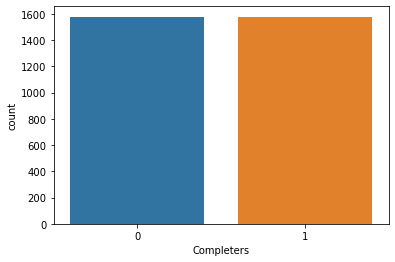

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='Completers', data = df)
plt.show()
plt.savefig('count_plot')

In [7]:
def performance_measure(actual, prediction):
    matrix = confusion_matrix(actual, prediction)
    FP = matrix.sum(axis=0) - np.diag(matrix)  
    FN = matrix.sum(axis=1) - np.diag(matrix)
    TP = np.diag(matrix)
    TN = matrix.sum() - (FP + FN + TP)
   
    return(TP, FP, TN, FN)

In [8]:
def sensitivity_score(y_true, y_pred, mode="multiclass"):
    if mode == "multiclass":
        TP, FP, TN, FN = performance_measure(y_true, y_pred)
        TPR = (TP/(TP+FN)).mean()
    elif mode == "binary":
        TP, FP, TN, FN = performance_measure(y_true, y_pred)
        TPR = (TP/(TP+FN))[1] # Since the [0] part is the index
    else:
        raise Exception("Mode not recognized!")
    
    return TPR

def specificity_score(y_true, y_pred, mode="multiclass"):
    if mode == "multiclass":
        TP, FP, TN, FN = performance_measure(y_true, y_pred)
        TNR = (TN/(TN+FP)).mean()
    elif mode == "binary":
        TP, FP, TN, FN = performance_measure(y_true, y_pred)
        TNR = (TN/(TN+FP))[1]
    else:
        raise Exception("Mode not recognized!")
    
    return TNR

In [9]:
scoring = {
            'accuracy':make_scorer(accuracy_score), 
            'precision':make_scorer(precision_score, average='weighted'),
            'f1_score':make_scorer(f1_score, average='weighted'),
            'recall':make_scorer(recall_score, average='weighted'), 
            'sensitivity':make_scorer(sensitivity_score, mode="multiclass"), 
            'specificity':make_scorer(specificity_score, mode="multiclass"), 
           }
scoring

{'accuracy': make_scorer(accuracy_score),
 'precision': make_scorer(precision_score, average=weighted),
 'f1_score': make_scorer(f1_score, average=weighted),
 'recall': make_scorer(recall_score, average=weighted),
 'sensitivity': make_scorer(sensitivity_score, mode=multiclass),
 'specificity': make_scorer(specificity_score, mode=multiclass)}

In [63]:
X = df.drop('Completers', axis=1)
X_list= list(df.columns)
X = np.array(X)
y = np.array(df['Completers'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:

from sklearn.linear_model import LogisticRegression #Logistic Regression

DT_model = DecisionTreeClassifier()
#gaussianNB_model = GaussianNB()
logisticRegression_model = LogisticRegression(max_iter=10000)
SVC_model= SVC(kernel='linear', probability=True) 
kNeighbors_model = KNeighborsClassifier()
RF_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [66]:
y_pred = RF_model.predict(X_test)

In [21]:
def evaluation_of_model(X, y, folds):    
  
    decisionTreeClassifier_result = cross_validate(DT_model, X, y, cv=folds, scoring=scoring)
    logisticRegression_result = cross_validate(logisticRegression_model, X, y, cv=folds, scoring=scoring)
    linearSVC_result = cross_validate(SVC_model, X, y, cv=folds, scoring=scoring)
    kNeighbors_result = cross_validate(kNeighbors_model, X, y, cv=folds, scoring=scoring)
    RandomForest_result = cross_validate(RF_model, X, y, cv=folds, scoring=scoring)
  
       # Create a data frame with the models perfoamnce metrics scores
    score_table = pd.DataFrame({
      'Decision Tree':[
                        decisionTreeClassifier_result['test_accuracy'].mean(),
                        decisionTreeClassifier_result['test_precision'].mean(),
                        decisionTreeClassifier_result['test_recall'].mean(),
                        decisionTreeClassifier_result['test_sensitivity'].mean(),
                        decisionTreeClassifier_result['test_specificity'].mean(),
                        decisionTreeClassifier_result['test_f1_score'].mean()
                       ],
                
        'Logistic Regression':[
                                logisticRegression_result['test_accuracy'].mean(),
                                logisticRegression_result['test_precision'].mean(),
                                logisticRegression_result['test_recall'].mean(),
                                logisticRegression_result['test_sensitivity'].mean(),
                                logisticRegression_result['test_specificity'].mean(),
                                logisticRegression_result['test_f1_score'].mean()
                            ],

      'Support Vector Classifier':[
                                    linearSVC_result['test_accuracy'].mean(),
                                    linearSVC_result['test_precision'].mean(),
                                    linearSVC_result['test_recall'].mean(),
                                    linearSVC_result['test_sensitivity'].mean(),
                                    linearSVC_result['test_specificity'].mean(),
                                    linearSVC_result['test_f1_score'].mean()
                                   ],

       'K-nearest Neighbors':[
                        kNeighbors_result['test_accuracy'].mean(),
                        kNeighbors_result['test_precision'].mean(),
                        kNeighbors_result['test_recall'].mean(),
                        kNeighbors_result['test_sensitivity'].mean(),
                        kNeighbors_result['test_specificity'].mean(),
                        kNeighbors_result['test_f1_score'].mean()
                       ],
        'Random Forest':[
                                    RandomForest_result['test_accuracy'].mean(),
                                    RandomForest_result['test_precision'].mean(),
                                    RandomForest_result['test_recall'].mean(),
                                    RandomForest_result['test_sensitivity'].mean(),
                                    RandomForest_result['test_specificity'].mean(),
                                    RandomForest_result['test_f1_score'].mean()
                                   ],

      },

      index=['Accuracy', 'Precision', 'Recall', 'Sensitivity', 'Specificity', 'F1 Score', ])
    

    return(score_table)

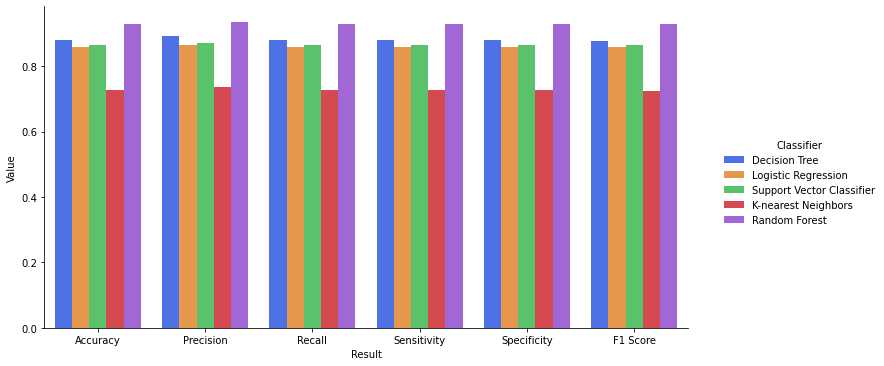

In [22]:
evaluationResult = evaluation_of_model(X, y, 10)
view = evaluationResult
view = view.rename_axis('Result').reset_index() #Add the index names to the column. This will be used for our presentation

# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
# Re-Organizing our dataframe to fit our view need
view = view.melt(var_name='Classifier', value_name='Value', id_vars='Result')
# result
sns.catplot(data=view, x="Result", y="Value", hue="Classifier", kind='bar', palette="bright", alpha=0.8, legend=True, height=5, margin_titles=True, aspect=2)

In [23]:
evaluation_of_model(X, y, 10)

,Decision Tree,Logistic Regression,Support Vector Classifier,K-nearest Neighbors,Random Forest
Accuracy,0.895209,0.858113,0.866350,0.727730,0.930035
Precision,0.902015,0.863786,0.870639,0.735081,0.936111
Recall,0.895209,0.858113,0.866350,0.727730,0.930035
Sensitivity,0.895209,0.858117,0.866353,0.727737,0.930037
Specificity,0.895209,0.858117,0.866353,0.727737,0.930037
F1 Score,0.894348,0.857517,0.865979,0.725716,0.929542


In [24]:
evaluationResult['Best Score'] = evaluationResult.idxmax(axis=1)
evaluationResult

,Decision Tree,Logistic Regression,Support Vector Classifier,K-nearest Neighbors,Random Forest,Best Score
Accuracy,0.880644,0.858113,0.866350,0.727730,0.930035,Random Forest
Precision,0.890980,0.863786,0.870639,0.735081,0.936111,Random Forest
Recall,0.880644,0.858113,0.866350,0.727730,0.930035,Random Forest
Sensitivity,0.880634,0.858117,0.866353,0.727737,0.930037,Random Forest
Specificity,0.880634,0.858117,0.866353,0.727737,0.930037,Random Forest
F1 Score,0.877088,0.857517,0.865979,0.725716,0.929542,Random Forest
